In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\Admin\\3D Objects\\imarticus PGDA\\Machine learning\\Unsupervised Learning\\Clustering\\Heirarchical\\Hierarchical Clustering'

In [3]:
data=pd.read_csv('google_review_ratings.csv')
df=data.copy(deep=True)
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [4]:
pd.options.display.max_columns=25

In [5]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [6]:
df.drop('Unnamed: 25',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [8]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


In [10]:
df.columns=column_names

In [11]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
df.describe(include='object')

,user_id,local_services
count,5456,5456
unique,5456,296
top,User 1,5
freq,1,1046


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

In [14]:
(df.local_services.str.isnumeric()==True).value_counts()

False    4372
True     1084
Name: local_services, dtype: int64

In [15]:
(df.local_services.str.isalnum()==True).index

RangeIndex(start=0, stop=5456, step=1)

In [16]:
df.local_services.unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [17]:
df.loc[2712,'local_services']=df.loc[2712,'local_services'].replace('\t','.').strip('.')

In [18]:
df[['local_services']] = df[['local_services']].apply(pd.to_numeric)

In [19]:
[df[i].value_counts() for i in df[1:]]

[User 1       1
 User 3636    1
 User 3644    1
 User 3643    1
 User 3642    1
             ..
 User 1817    1
 User 1816    1
 User 1815    1
 User 1814    1
 User 5456    1
 Name: user_id, Length: 5456, dtype: int64,
 0.00    195
 1.37     90
 1.30     77
 1.34     74
 1.36     73
        ... 
 4.65      1
 4.67      1
 3.70      1
 2.75      1
 4.60      1
 Name: churches, Length: 281, dtype: int64,
 5.00    880
 1.42     92
 0.00     90
 1.41     89
 1.37     65
        ... 
 3.99      1
 3.04      1
 4.78      1
 3.02      1
 3.06      1
 Name: resorts, Length: 340, dtype: int64,
 5.00    813
 1.42    112
 1.41     79
 1.43     74
 1.44     69
        ... 
 0.57      1
 0.59      1
 0.79      1
 4.09      1
 3.94      1
 Name: beaches, Length: 328, dtype: int64,
 5.00    1067
 2.63     111
 1.43      72
 2.62      64
 1.46      62
         ... 
 3.78       1
 3.77       1
 1.13       1
 1.16       1
 3.92       1
 Name: parks, Length: 293, dtype: int64,
 5.00    1234
 2.65      8

In [20]:
df.isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

In [21]:
df['gardens'].unique()

array([0.  , 0.51, 0.53, 0.54, 0.55, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.77, 0.8 , 0.88, 0.9 , 0.93, 0.85, 0.86, 0.89, 0.91, 0.96,
       0.95, 0.98, 1.  , 1.02, 1.04, 1.05, 1.07, 1.09, 1.11, 1.12, 1.14,
       1.16, 1.17, 1.19, 1.21, 1.23, 1.24, 1.25, 0.75, 5.  , 4.78, 4.77,
       0.76, 0.78, 0.79, 0.83, 0.94, 0.99, 1.03, 1.06, 1.22, 1.18, 1.2 ,
       1.28, 1.27, 1.29, 1.31, 1.33, 1.36, 1.37, 1.35, 1.34, 1.5 , 1.38,
       1.39, 1.4 , 1.42, 1.44, 1.48, 1.26, 1.3 , 1.41, 1.43, 1.46, 1.53,
       1.54, 1.56, 1.6 , 1.62, 1.64, 1.57, 1.58, 1.55, 1.65, 1.59, 1.69,
       1.82, 1.7 , 1.72, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87,
       1.89, 1.91, 1.93, 1.95, 1.92, 1.61, 1.71, 1.63, 2.25, 1.67, 1.68,
       2.32, 1.76, 2.35, 1.66, 4.3 , 0.92, 0.97, 1.08, 1.1 , 1.13, 1.15,
       0.82, 0.84, 0.87, 1.78, 1.32, 1.45, 1.47, 1.49, 1.51, 1.52, 1.74,
       1.8 , 1.84, 1.86, 1.88, 1.9 , 1.94, 2.  , 0.

In [22]:
# treating null values
df=df.fillna(df.mean())
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_8400/911396393.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64

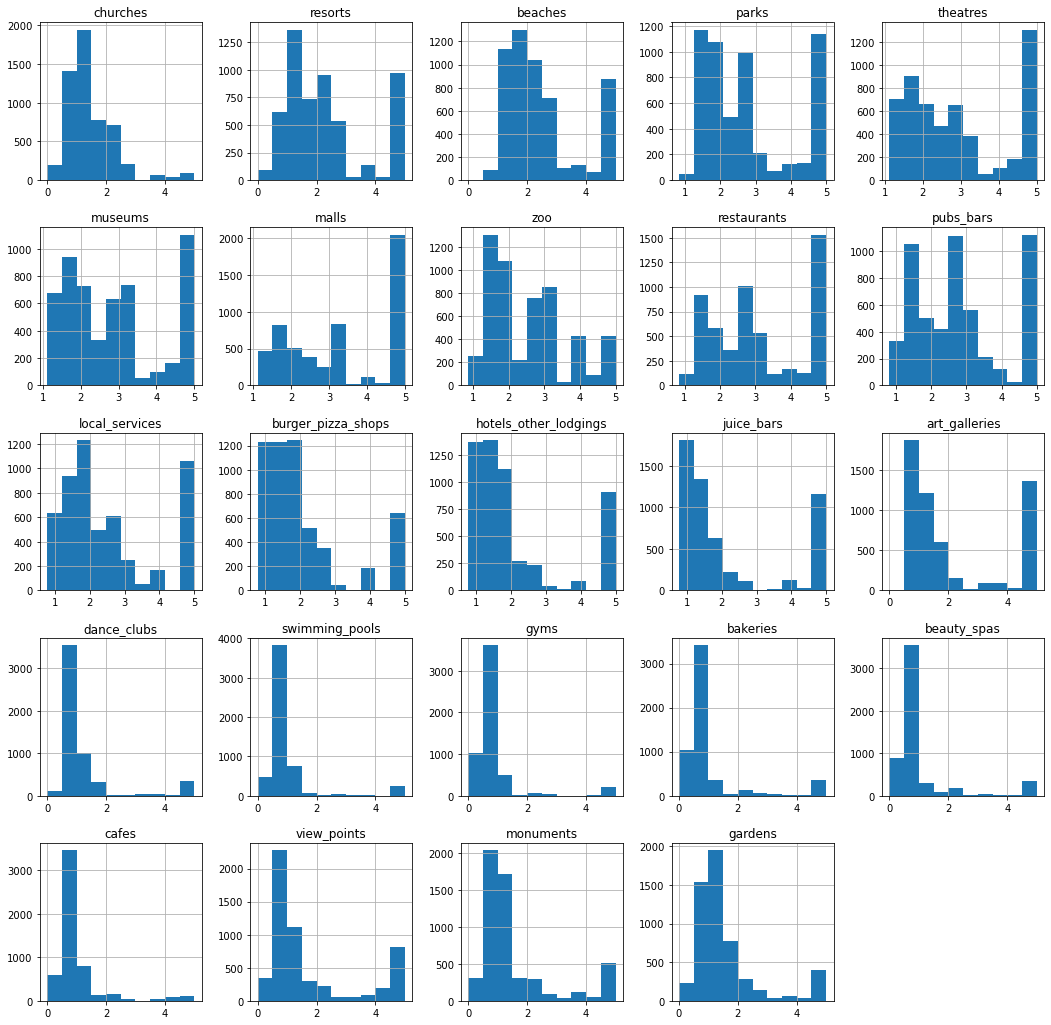

In [23]:
df_treated=df.copy(deep=True)
fig=df_treated.hist(figsize=(18,18))

In [24]:
# Creating the dataframe containg number of review for each feature
rated=df.values!=0
df_rated=pd.DataFrame(rated,columns=column_names)
df_rated[df_rated==True].sum().sort_values()


bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
beaches                  5452
art_galleries            5452
juice_bars               5456
user_id                  5456
local_services           5456
pubs_bars                5456
restaurants              5456
zoo                      5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
hotels_other_lodgings    5456
burger_pizza_shops       5456
dtype: object

In [25]:
# Creating the dataframe containg number of review for each feature
df_treated[column_names[1:]].astype(bool).sum(axis=0).sort_values()

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
art_galleries            5452
beaches                  5452
pubs_bars                5456
local_services           5456
zoo                      5456
hotels_other_lodgings    5456
juice_bars               5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
restaurants              5456
burger_pizza_shops       5456
dtype: int64

In [26]:
reviews=df_treated.astype(bool).sum().sort_values()
reviews

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
beaches                  5452
art_galleries            5452
juice_bars               5456
user_id                  5456
local_services           5456
pubs_bars                5456
restaurants              5456
zoo                      5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
hotels_other_lodgings    5456
burger_pizza_shops       5456
dtype: int64

In [27]:
len(reviews.index)

25

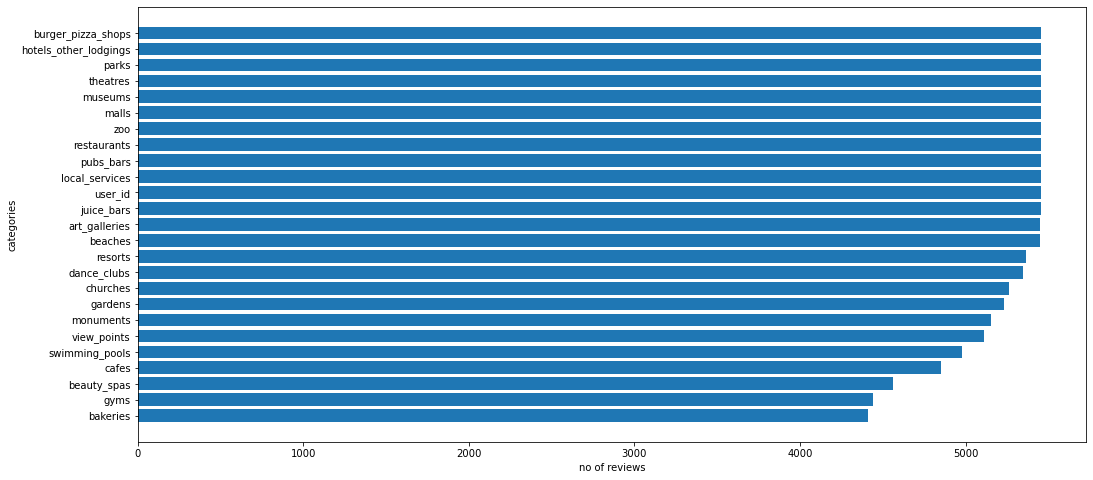

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualizing no of reviews of every categories
plt.figure(figsize=(17,8))
plt.barh(range(len(reviews.index)),reviews.values)
plt.yticks(range(len(reviews.index)),reviews.index)
plt.xlabel('no of reviews')
plt.ylabel('categories')

plt.show()

In [29]:
#Now let's check how many users have given reviews to the features
# Creating a dataframe to store number of reviews by users
no_of_reviews=df_treated.astype(bool).sum(axis=1).value_counts()
no_of_reviews

25    3725
24     505
22     457
21     243
23     167
20     148
19     114
18      69
17      22
16       6
dtype: int64

Text(0.5, 1.0, 'No of Categories vs No of reviews')

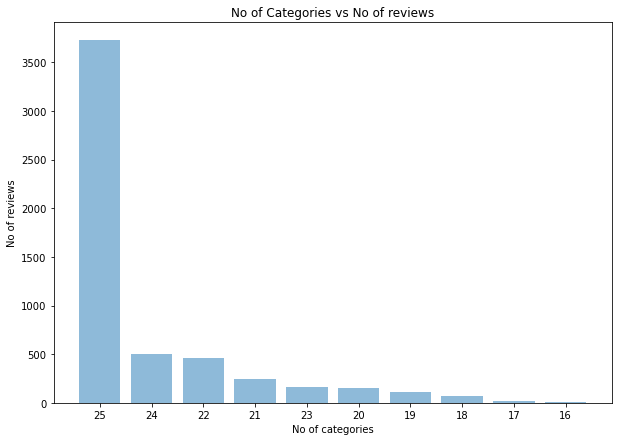

In [30]:
# Plotting the number of customers vs numbe of review
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

In [31]:
#new = data_1['user_id'].str.split(' ',n=2,expand=True)
#data_1['user'] = new[0]
#data_1['id'] = new[1]
#data_1 = data_1.drop(['user_id','user'],axis=1)
#data_1.head()

In [32]:
df_treated.user_id=df_treated['user_id'].str.split('').apply(lambda x:x[6])
df_treated.user_id

0       1
1       2
2       3
3       4
4       5
       ..
5451    5
5452    5
5453    5
5454    5
5455    5
Name: user_id, Length: 5456, dtype: object

In [33]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   float64
 12  burger_pizza_shops     5456 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

In [34]:
df_treated[['user_id']]=df_treated[['user_id']].apply(pd.to_numeric)


In [35]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   int64  
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   float64
 12  burger_pizza_shops     5456 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

In [36]:
np.count_nonzero(df_treated)

131081

In [37]:
pd.DataFrame(np.count_nonzero(df_treated, axis=0), index=df_treated.columns, columns=['Value']).sort_values('Value')

,Value
bakeries,4410
gyms,4439
beauty_spas,4560
cafes,4852
swimming_pools,4977
view_points,5111
monuments,5154
gardens,5231
churches,5261
dance_clubs,5344


In [38]:
df_final=df_treated.copy(deep=True)

# Hierarchical Clustering


In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram,linkage

In [51]:
z = sch.linkage(df_final,method='ward')
z


array([[1.33800000e+03, 1.34600000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.70000000e+02, 6.74000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.98900000e+03, 4.99000000e+03, 1.00000000e-02, 2.00000000e+00],
       ...,
       [1.08940000e+04, 1.09060000e+04, 1.61500766e+02, 2.19800000e+03],
       [1.09040000e+04, 1.09070000e+04, 1.91940007e+02, 3.25800000e+03],
       [1.09080000e+04, 1.09090000e+04, 2.42987483e+02, 5.45600000e+03]])

Text(0.5, 1.0, 'hierarchical Clustering')

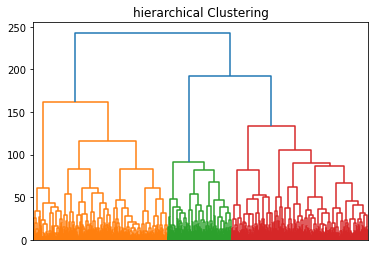

In [57]:
# Creating and plotting a dendogram
den=sch.dendrogram(z)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.title('hierarchical Clustering')

In [56]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


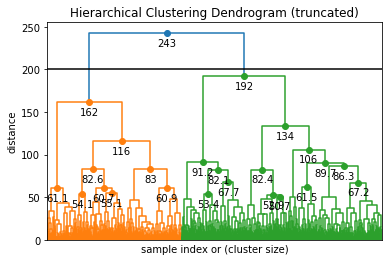

In [64]:
fd(z,leaf_rotation=90.,show_contracted=True,annotate_above=50,max_d=200)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
#fitting the model
agc=AgglomerativeClustering(n_clusters=2,affinity ='euclidean',linkage='ward')

y_cluster=agc.fit_predict(df_final)

In [46]:
df_final['cluster']=y_cluster
df_clustered=df_final.copy(deep=True)
df_clustered['cluster']=df_clustered['cluster'].astype('object')

In [50]:
df_clustered['cluster'].value_counts()

0    3258
1    2198
Name: cluster, dtype: int64

In [68]:
# Conclusion
#By using heirarchical clustering we clustered review into two category, positive review and a negeative review


result = df_clustered.copy()
result.replace({'Cluster' : 1} , 'Positive' , inplace=True)
result.replace({'Cluster' : 0} , 'Negeative' , inplace= True)




In [67]:
result

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,...,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,cluster
0,1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,...,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0
1,2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,...,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0
2,3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,...,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0
3,4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,...,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0
4,5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,...,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,5,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,...,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,0
5452,5,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,...,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,0
5453,5,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,...,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,0
5454,5,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,...,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,0
